# ECS7020P mini-project submission
Advance solution

### 1. Author

Student Name - Shivani Gurung R

Student ID - 210268155

### 2 Problem formulation

This project will focus on automatic Gender Classification.
The project can classify the gender of the audio humming,based on the voice features.
Classifying audio recordings is a process that can be applied to various AI applications, such as identifying music genres or acting as a virtual assistant.



### 3 Machine Learning pipeline

in this project we have taken the .wav files from the basic solution and the by adding the audio features conerted them to a .csv to make it efficient in the processing of the data.
Various classification models are used to sort audio files into corresponding class labels.we have used bar charts to show if there is any outliers.
K-Nearest Neighbor -A KNN can be applied both to classification and to regression problems. In the industry, however, classification problems are more common.
once the test train for KNN we found that the best n_neighbor = 4 as shown in the figure in the below sections , so we can then train with the optimal parameter.
The pre-processing stage includes loading the inputs and extracting the features corresponding to each audio files
In both instances, precision values are used to determine the accuracy of the introduced models.




### 4 Transformation stage
A csv file with the features and filename is generated and is stored as 'feature.csv'.
the audio features that i have used in this project are rms_mean,	pitch_mean,	pitch_std and	voiced_fr.
the models that we will be using in this projects are SVM (Support Vectore Machine ), Knn( k-Nearest Neighbors) and the RF (Random Forest).

we will be using different evaluation metrics like model.score,Cross Validation, Precision, Recall, F1 Score in order to see which model is the optimal model for the given dataset.



### 5 Modelling
we have used three models here 
Support Vector Machines(svm), Knn( k-Nearest Neighbors) and the RF (Random Forest).we have used Knn- test run to determine the optimal n_neighbors.The (random forest) algorithmic program establishes the result supported the predictions of the decision trees.


### 6 Methodology
here in this project with the help of audio feature extraction like pitch we will visualize the audio so that we get a better picture of it. then by adding more audio features with the help of audio features we will then finally divide the data and then train them in to the models and then get the accuracy score of each audio feature after training them into the models.


### 7 Dataset

In this project we are using a total of 606 .wav files which only humming of the songs. the .wav files were converted to .csv files based on the audio features,the file is named by adv_sol(1).csv 

In [103]:
import numpy as np
import pandas as pd
from io import StringIO

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix,precision_recall_fscore_support, accuracy_score, plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve, cross_val_score

kfold = KFold(n_splits=5)


In [104]:
# Random Forest feature importance Function
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'Importance':m.feature_importances_}
                       ).sort_values('Importance', ascending=False)

In [105]:
# Random Forest feature importance Plot Function
def plot_fi(fi):
    return fi.plot('cols', 'Importance', 'barh', figsize=(12,7), legend=False)

In [106]:
voicef=r'/content/adv_sol (1).csv'
voiceDf = pd.read_csv(voicef)
voiceDf.head()

,Unnamed: 0,rms_mean,pitch_mean,pitch_std,voiced_fr,target_song,label
0,0,0.039056,105.155667,20.033936,0.558480,False,male
1,1,0.075389,316.960312,68.016652,0.887183,False,male
2,2,0.049413,211.107406,30.526221,0.967517,False,male
3,3,0.019198,315.173055,53.953579,0.709845,False,female
4,4,0.010768,284.082884,58.904100,0.723125,False,female


In [107]:
voiceDf.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('bool'), dtype('O')],
      dtype=object)

In order to visualize the dataset, we need to convert the laberl column to a numerical value

In [108]:
voiceDf["label"] = LabelEncoder().fit_transform(voiceDf["label"]) # 1 -> male , 0-> female

A pairplot shown here is plotted to show the relationship between dataset features, and we see that skewness relates weakly to the quartiles, instead of the meanfreq relating strongly to the centroid.

The barcharts below shows the if there are any outliers

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


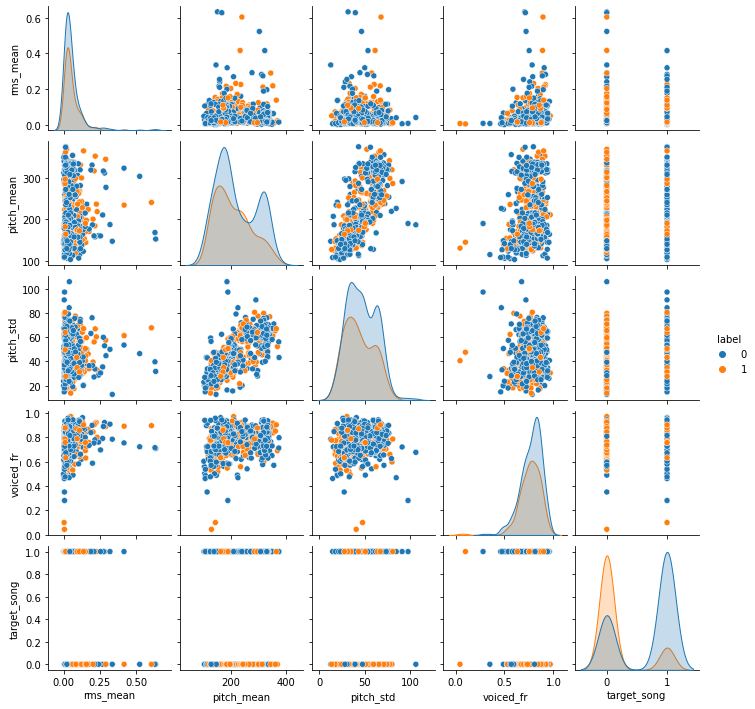

In [109]:
sns.pairplot(voiceDf[['rms_mean','pitch_mean','pitch_std',	'voiced_fr','target_song', 'label']], hue='label', size=2)

The below Heatmap shows the correlations between the features; and by looking at it we find a positive correlation between the label and IQR, label and sp.ent, and a huge negative correlation between the label and meanfun.

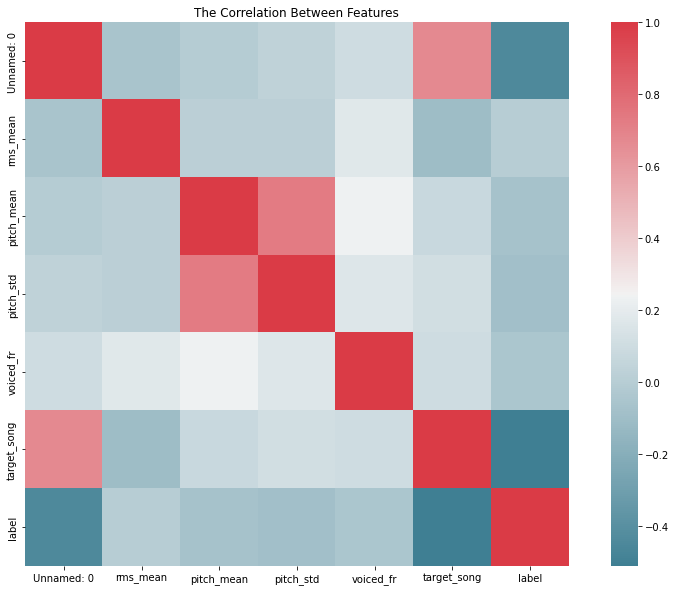

In [110]:
f, ax = plt.subplots(figsize=(15, 10))
corr = voiceDf.corr()
sns.heatmap(corr,mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title('The Correlation Between Features')
plt.show()

In [111]:
gender_label = voiceDf.iloc[:, -1].to_numpy()
voiceDf1 = voiceDf.iloc[:, :-1]

In [112]:
voiceX_train, voiceX_test, voiceY_train, voiceY_test = train_test_split(voiceDf1, gender_label, test_size=0.3, random_state=42)

In [113]:
sc1= StandardScaler()
voiceX_train = sc1.fit_transform(voiceX_train)
voiceX_test = sc1.transform(voiceX_test)

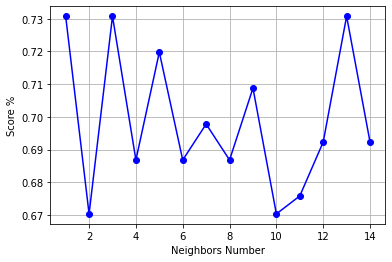

In [114]:
#kNearest Neighbor
# KNN test run to determine the optimal n_neighbors
knn_valid_score_list=[]
n_neighbors_num = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]

for i in range(1,15):
    test_knn = KNeighborsClassifier(n_neighbors=i)
    test_knn.fit(voiceX_train, voiceY_train)
    knn_valid_score_list.append(test_knn.score(voiceX_test, voiceY_test))
    
plt.plot(n_neighbors_num,  knn_valid_score_list, "b")
plt.plot(n_neighbors_num,  knn_valid_score_list, "bo")
plt.xlabel("Neighbors Number")
plt.ylabel("Score %")
plt.grid(True)
plt.show()

Knn model

In [115]:

knn = KNeighborsClassifier(n_neighbors=4).fit(voiceX_train, voiceY_train)

# Model Prediction
voice_pred_knn=knn.predict(voiceX_test)
prf_knn=precision_recall_fscore_support(voiceY_test, voice_pred_knn, average='macro')

#Evaluation Methods
voice_score_knn = accuracy_score(voice_pred_knn, voiceY_test)
accuracy_results_knn = cross_val_score(knn, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_knn = prf_knn[0]
Recall_knn = prf_knn[1]
f1_knn = prf_knn[2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


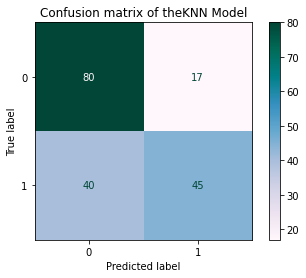

In [116]:
plot_confusion_matrix(knn,voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of theKNN Model')
plt.show()

SVM model

In [117]:

svm = SVC().fit(voiceX_train,voiceY_train)

# Model Prediction
voice_pred_svm=svm.predict(voiceX_test)
prf_svm=precision_recall_fscore_support(voiceY_test, voice_pred_svm, average='macro')

# Evaluation Methods
voice_score_svm = accuracy_score(voice_pred_svm, voiceY_test)
accuracy_results_svm = cross_val_score(svm, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_svm = prf_svm[0]
Recall_svm = prf_svm[1]
f1_svm = prf_svm[2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


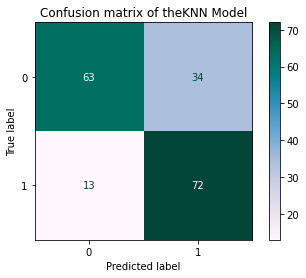

In [118]:
plot_confusion_matrix(svm,voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of theKNN Model')
plt.show()

Random Forest Classifier

In [119]:

rf = RandomForestClassifier(n_estimators=100).fit(voiceX_train, voiceY_train)

#Prediction
voice_pred_rf = rf.predict(voiceX_test)
prf_rf=precision_recall_fscore_support(voiceY_test, voice_pred_rf, average='macro')

# Model Evaluation Methods
voice_score_rf = accuracy_score(voice_pred_rf, voiceY_test)
accuracy_results_rf = cross_val_score(rf, voiceX_train, voiceY_train, cv=kfold).mean()
Precision_rf = prf_rf[0]
Recall_rf = prf_rf[1]
f1_rf = prf_rf[2]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


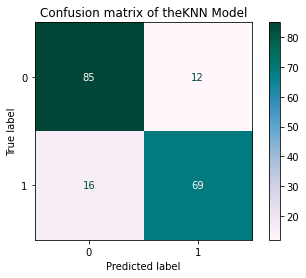

In [120]:
plot_confusion_matrix(rf,voiceX_test, voiceY_test, cmap='PuBuGn')
plt.title('Confusion matrix of theKNN Model')
plt.show()

In [121]:
rf_importance = rf_feat_importance(rf, voiceDf1)
rf_importance.head()

,cols,Importance
0,Unnamed: 0,0.471234
5,target_song,0.134171
1,rms_mean,0.108128
2,pitch_mean,0.103661
3,pitch_std,0.091927


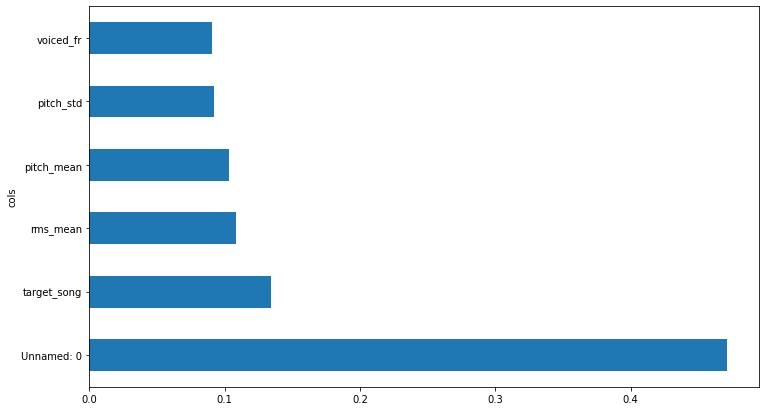

In [122]:
plot_fi(rf_importance);

### 8 Results



In [123]:
knn_train_sizes, knn_train_scores, knn_valid_scores, *_ = learning_curve(knn, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

svm_train_sizes, svm_train_scores, svm_valid_scores, *_ = learning_curve(svm, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

rf_train_sizes, rf_train_scores, rf_valid_scores, *_ = learning_curve(rf, voiceX_train, voiceY_train, n_jobs=-1,
                                                        random_state=42, cv=3)

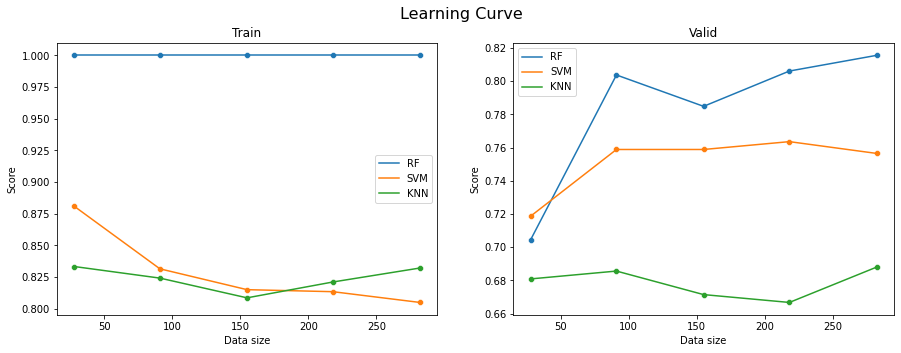

In [124]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Learning Curve', fontsize=16)
# The Training Plots
sns.scatterplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= rf_train_sizes, y= rf_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= svm_train_sizes, y= svm_train_scores.mean(axis=1))
sns.scatterplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
sns.lineplot(ax=axes[0], x= knn_train_sizes, y= knn_train_scores.mean(axis=1))
axes[0].set_title('Train')
axes[0].set_xlabel('Data size')
axes[0].set_ylabel('Score')
axes[0].legend(['RF', 'SVM', 'KNN'])

# The Validation Plots
sns.scatterplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= rf_train_sizes, y= rf_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= svm_train_sizes, y= svm_valid_scores.mean(axis=1))
sns.scatterplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
sns.lineplot(ax=axes[1], x= knn_train_sizes, y= knn_valid_scores.mean(axis=1))
axes[1].set_title('Valid')
axes[1].set_xlabel('Data size')
axes[1].set_ylabel('Score')
axes[1].legend(['RF', 'SVM', 'KNN'])
plt.show()

In [125]:
model_performance_table = pd.DataFrame({
    'Model': ['SVM', 'KNN', 'RF'],
    'Model Score': [voice_score_svm, voice_score_knn, voice_score_rf],
    'Cross Validation': [accuracy_results_svm, accuracy_results_knn, accuracy_results_rf],
    'Valid Precision': [Precision_svm, Precision_knn, Precision_rf],
    'Valid Recall': [Recall_svm, Recall_knn, Recall_rf],
    'Valid F1 Score': [f1_svm, f1_knn, f1_rf]
})

model_performance_table.sort_values(by="Model Score", ascending=False)

,Model,Model Score,Cross Validation,Valid Precision,Valid Recall,Valid F1 Score
2,RF,0.846154,0.841541,0.846718,0.844027,0.844956
0,SVM,0.741758,0.756471,0.754096,0.748272,0.741125
1,KNN,0.686813,0.706835,0.696237,0.677077,0.674786


### 9 Conclusions¶
In conclusion here we can see that RF has the best performance with accuracy of 84% and SVM comes second with accuracy of 74% 
as we can see the KNN has the least score which is about 67% so we can consider random forest classifier as better model for this data set. 
 Here, we have only considered about 606 audio files in total as a csv. so when we Increase the number of data set that will allow the models to analyze the pattern in the features to give better accurate prediction.


